## Labels for Supervised Data Set

In [33]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Import the data 
df = pd.read_csv('Churn_Modelling.csv')

#View the Dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<function matplotlib.pyplot.show(*args, **kw)>

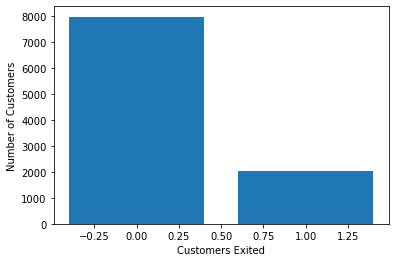

In [35]:
#Look at breakdown of the Staff who have left
exited = df.groupby('Exited').count()

plt.bar(exited.index.values,exited['CustomerId'])
plt.xlabel('Customers Exited')
plt.ylabel('Number of Customers')
plt.show

In [36]:
#Show the number of Exited customers
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## Cluster Analysis

In [37]:
#Import the necessary dependencies 
from sklearn.cluster import KMeans

In [38]:
# Assign a DataFrame with only the exited Customers
Exit_df = df[df['Exited'] == 1]

#Check DataFrame
Exit_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [39]:
#Filter the Data required on Age and Balance
exited1 = df[['Age', 'Balance']][df.Exited == 1]

## Create groups using K-means clustering
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(exited1)

In [40]:
print(len(kmeans.labels_))
print(len(df.index))

2037
10000


In [41]:
#Add a new column to assign the cluster labels 
exited1['label'] = kmeans.labels_

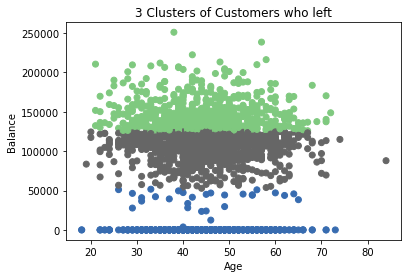

In [42]:
#Create a Scatter Plot 
plt.scatter(exited1["Age"], exited1["Balance"],c=exited1['label'],cmap='Accent')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('3 Clusters of Customers who left')
plt.show()

In [43]:
#Repeat with 5 Clusters
#Filter the Data required on Age and Balance
exited2 = df[['Age', 'Balance']][df.Exited == 1]

## Create groups using K-means clustering
kmeans = KMeans(n_clusters = 5, random_state = 0).fit(exited2)

#Add a new column to assign the cluster labels
exited2['label'] = kmeans.labels_

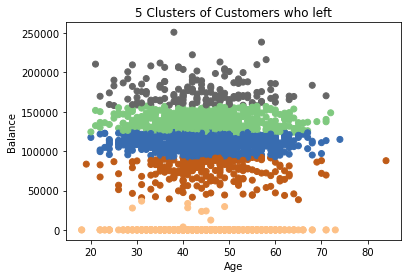

In [44]:
plt.scatter(exited2["Age"], exited2["Balance"],c=exited2['label'],cmap='Accent')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('5 Clusters of Customers who left')
plt.show()